In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")
# Import the dataset
disorders_data = spark.read.csv("Mental health Depression disorder Data.csv", header=True, inferSchema=True)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/15 03:33:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
disorders_data.show()
disorders_data.printSchema()
print(f"The dataset has {disorders_data.count()} rows and {len(disorders_data.columns)} columns.")

+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|index|     Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|
+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|    0|Afghanistan| AFG|1990|          0.16056|            0.697779|            0.101855|              4.82883|              1.677082|      4.071831|                 0.672404|
|    1|Afghanistan| AFG|1991|         0.160312|            0.697961|            0.099313|              4.82974|              1.684746|      4.079531|                 0.671768|
|    2|Afghanistan| AFG|1992|         0.160135|            0.698107|            0.096692|             4.831108|         

In [3]:
print(dir())

['In', 'Out', 'SparkSession', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_ih', '_ii', '_iii', '_oh', 'disorders_data', 'exit', 'get_ipython', 'quit', 'spark']


In [4]:
# Get the number of unique values in Entity
unique_count = disorders_data.select("Entity").distinct().count()
print("Number of unique values in the column:", unique_count)

Number of unique values in the column: 276


+----+-----------------+
|Year|Schizophrenia (%)|
+----+-----------------+
|1990|         0.253503|
|1991|         0.253542|
|1992|          0.25358|
|1993|         0.253643|
|1994|           0.2537|
+----+-----------------+
only showing top 5 rows



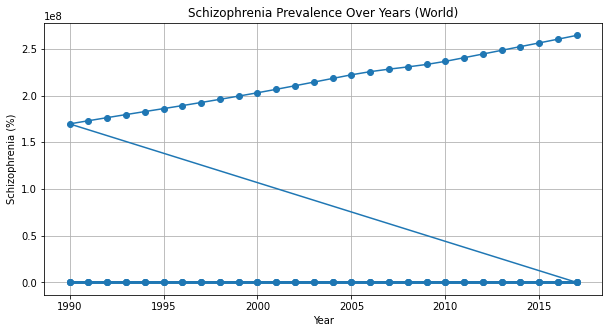

In [5]:
# Generate a plot of world Schizophrenia (%) trend
from pyspark.sql.functions import col, isnan
world_data = disorders_data.filter(col("Entity") == "World")
world_data = world_data.filter(~world_data["Year"].contains("BCE"))
world_data = world_data.withColumn("Year", world_data["Year"].cast("int"))
world_data = world_data.filter((col("Year") >= 1990) & (col("Year") <= 2017))
world_data = world_data.withColumn("Schizophrenia (%)", col("Schizophrenia (%)").cast("float"))
world_data.select("Year", "Schizophrenia (%)").show(5)

import matplotlib.pyplot as plt
plot_data = world_data.select("Year", "Schizophrenia (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Year'], plot_data['Schizophrenia (%)'], marker='o', linestyle='-')
plt.title('Schizophrenia Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Schizophrenia (%)')
plt.grid(True)
plt.show()

+----+--------------------+
|Year|Bipolar disorder (%)|
+----+--------------------+
|1990|            0.585743|
|1991|             0.58599|
|1992|            0.586309|
|1993|            0.586637|
|1994|             0.58693|
+----+--------------------+
only showing top 5 rows



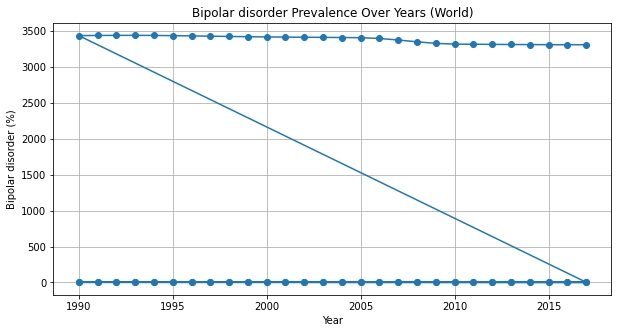

In [6]:
# Generate a plot of world Bipolar disorder (%) trend
world_data1 = disorders_data.filter(col("Entity") == "World")
world_data1 = world_data1.filter(~world_data1["Year"].contains("BCE"))
world_data1 = world_data1.withColumn("Year", world_data1["Year"].cast("int"))
world_data1 = world_data1.filter((col("Year") >= 1990) & (col("Year") <= 2017))
bipolar_data = world_data1.withColumn("Bipolar disorder (%)", col("Bipolar disorder (%)").cast("float"))
bipolar_data.select("Year", "Bipolar disorder (%)").show(5)

import matplotlib.pyplot as plt
plot_data = bipolar_data.select("Year", "Bipolar disorder (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Year'], plot_data['Bipolar disorder (%)'], marker='o', linestyle='-')
plt.title('Bipolar disorder Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Bipolar disorder (%)')
plt.grid(True)
plt.show()

+----+--------------------+
|Year|Eating disorders (%)|
+----+--------------------+
|1990|            0.177865|
|1991|            0.178034|
|1992|            0.178218|
|1993|            0.178419|
|1994|            0.178688|
+----+--------------------+
only showing top 5 rows



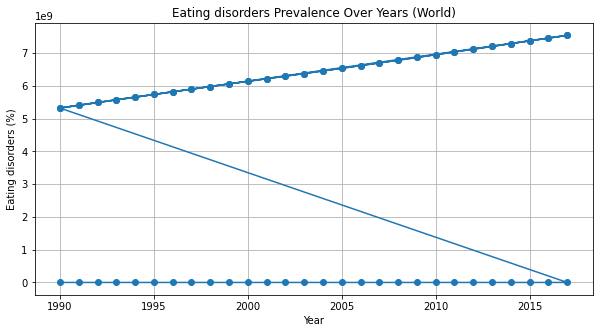

In [7]:
# Generate a plot of world Eating disorders (%) trend
Eating_data = world_data1.withColumn("Eating disorders (%)", col("Eating disorders (%)").cast("float"))
Eating_data.select("Year", "Eating disorders (%)").show(5)

import matplotlib.pyplot as plt
Eating_plot_data = Eating_data.select("Year", "Eating disorders (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(Eating_plot_data['Year'], Eating_plot_data['Eating disorders (%)'], marker='o', linestyle='-')
plt.title('Eating disorders Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Eating disorders (%)')
plt.grid(True)
plt.show()

+----+---------------------+
|Year|Anxiety disorders (%)|
+----+---------------------+
|1990|             3.774653|
|1991|              3.77276|
|1992|             3.771018|
|1993|              3.76986|
|1994|             3.769128|
+----+---------------------+
only showing top 5 rows



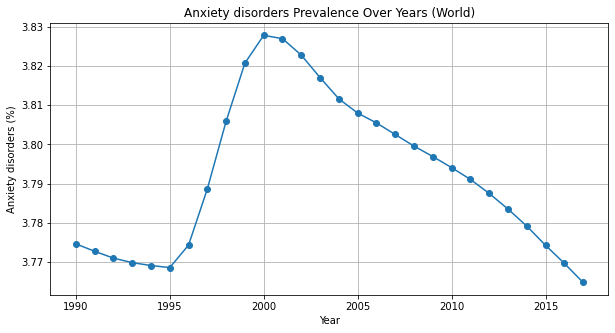

In [8]:
# Generate a plot of world Anxiety disorders (%) trend
Anxiety_data = world_data1.withColumn("Anxiety disorders (%)", col("Anxiety disorders (%)").cast("float"))
Anxiety_data.select("Year", "Anxiety disorders (%)").show(5)

import matplotlib.pyplot as plt
Anxiety_plot_data = Anxiety_data.select("Year", "Anxiety disorders (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(Anxiety_plot_data['Year'], Anxiety_plot_data['Anxiety disorders (%)'], marker='o', linestyle='-')
plt.title('Anxiety disorders Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Anxiety disorders (%)')
plt.grid(True)
plt.show()

+----+----------------------+
|Year|Drug use disorders (%)|
+----+----------------------+
|1990|               0.90085|
|1991|              0.900952|
|1992|              0.901787|
|1993|              0.903045|
|1994|              0.904346|
+----+----------------------+
only showing top 5 rows



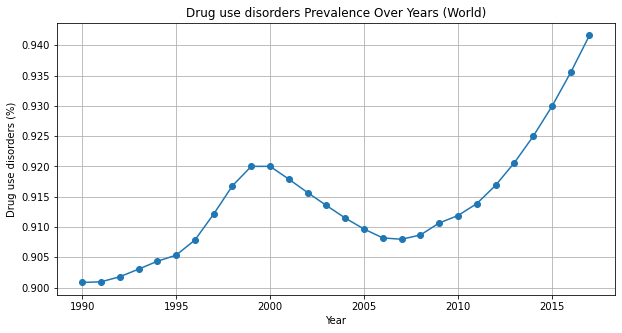

In [9]:
# Generate a plot of world Drug use disorders (%) trend
Drug_data = world_data1.withColumn("Drug use disorders (%)", col("Drug use disorders (%)").cast("float"))
Drug_data.select("Year", "Drug use disorders (%)").show(5)

import matplotlib.pyplot as plt
Drug_plot_data = Drug_data.select("Year", "Drug use disorders (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(Drug_plot_data['Year'], Drug_plot_data['Drug use disorders (%)'], marker='o', linestyle='-')
plt.title('Drug use disorders Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Drug use disorders (%)')
plt.grid(True)
plt.show()

+----+--------------+
|Year|Depression (%)|
+----+--------------+
|1990|      3.541656|
|1991|      3.545953|
|1992|       3.54909|
|1993|      3.550657|
|1994|      3.550852|
+----+--------------+
only showing top 5 rows



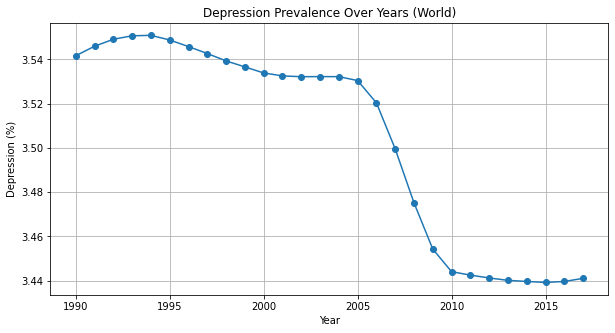

In [10]:
# Generate a plot of world Depression (%) trend
Depression_data = world_data1.withColumn("Depression (%)", col("Depression (%)").cast("float"))
Depression_data.select("Year", "Depression (%)").show(5)

import matplotlib.pyplot as plt
Depression_plot_data = Depression_data.select("Year", "Depression (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(Depression_plot_data['Year'], Depression_plot_data['Depression (%)'], marker='o', linestyle='-')
plt.title('Depression Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Depression (%)')
plt.grid(True)
plt.show()

+----+-------------------------+
|Year|Alcohol use disorders (%)|
+----+-------------------------+
|1990|                 1.438494|
|1991|                 1.444019|
|1992|                 1.449593|
|1993|                 1.454155|
|1994|                 1.457587|
+----+-------------------------+
only showing top 5 rows



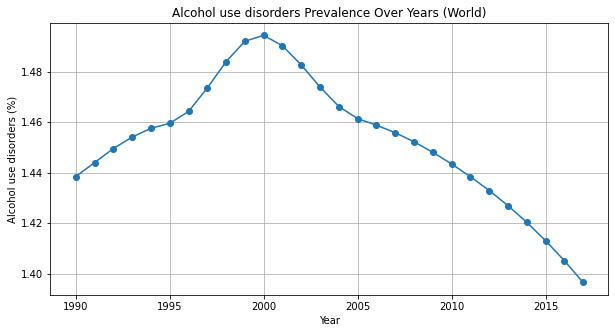

In [11]:
# Generate a plot of world Alcohol use disorders (%) trend
Alcohol_data = world_data1.withColumn("Alcohol use disorders (%)", col("Alcohol use disorders (%)").cast("float"))
Alcohol_data.select("Year", "Alcohol use disorders (%)").show(5)

Alcohol_plot_data = Alcohol_data.select("Year", "Alcohol use disorders (%)").toPandas()
plt.figure(figsize=(10, 5))
plt.plot(Alcohol_plot_data['Year'], Alcohol_plot_data['Alcohol use disorders (%)'], marker='o', linestyle='-')
plt.title('Alcohol use disorders Prevalence Over Years (World)')
plt.xlabel('Year')
plt.ylabel('Alcohol use disorders (%)')
plt.grid(True)
plt.show()

In [12]:
# Import the dataset
happiness_data = spark.read.csv("World Happiness Report.csv", header=True, inferSchema=True)
happiness_data.show()
happiness_data.printSchema()
print(f"The dataset has {happiness_data.count()} rows and {len(happiness_data.columns)} columns.")

+------------+--------------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+------------+-------------------------+---------------+---------------+---------------------------------+
|Country Name|  Regional Indicator|Year|Life Ladder|Log GDP Per Capita|Social Support|Healthy Life Expectancy At Birth|Freedom To Make Life Choices|  Generosity|Perceptions Of Corruption|Positive Affect|Negative Affect|Confidence In National Government|
+------------+--------------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+------------+-------------------------+---------------+---------------+---------------------------------+
| Afghanistan|          South Asia|2008|3.723589897|       7.350416183|   0.450662315|                            50.5|                 0.718114316| 0.167652458|               0.88168633|    0.414297044|     0.25819549|                   

In [13]:
# Get the number of unique values in Country Name
unique_country = happiness_data.select("Country Name").distinct().count()
print("Number of unique values in the column:", unique_country)

Number of unique values in the column: 165


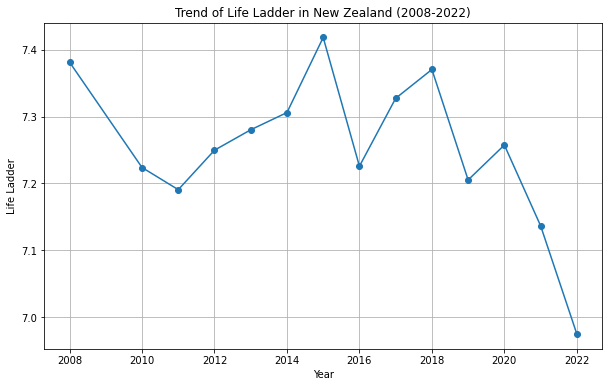

In [14]:
# Use New Zealand as an instance to explore the World Happiness Report dataset
nz_data = happiness_data.filter(
    (col("Country Name") == "New Zealand") &
    (col("Year") >= 2008) &
    (col("Year") <= 2022)
)
nz_data = nz_data.withColumn("Year", col("Year").cast("int"))
nz_pandas_data = nz_data.select("Year", "Life Ladder").toPandas()
plt.figure(figsize=(10, 6))
plt.plot(nz_pandas_data['Year'], nz_pandas_data['Life Ladder'], marker='o', linestyle='-')
plt.title('Trend of Life Ladder in New Zealand (2008-2022)')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

In [15]:
# Check quantities of missing values
from pyspark.sql.functions import count, when
disorders_missing_values = disorders_data.select([
    count(when(col(c).isNull(), c)).alias(c) for c in disorders_data.columns
])

disorders_missing_values.show()

+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|index|Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|
+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|    0|     0|5412|   0|            82678|               89147|                8317|               102085|                102085|        102085|                   102085|
+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+



In [16]:
happiness_missing_values = happiness_data.select([
    count(when(col(c).isNull(), c)).alias(c) for c in happiness_data.columns
])

happiness_missing_values.show()

+------------+------------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+----------+-------------------------+---------------+---------------+---------------------------------+
|Country Name|Regional Indicator|Year|Life Ladder|Log GDP Per Capita|Social Support|Healthy Life Expectancy At Birth|Freedom To Make Life Choices|Generosity|Perceptions Of Corruption|Positive Affect|Negative Affect|Confidence In National Government|
+------------+------------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+----------+-------------------------+---------------+---------------+---------------------------------+
|           0|               112|   0|          0|                20|            13|                              54|                          33|        73|                      116|             24|             16|                              361|


In [17]:
happiness_data.printSchema()

root
 |-- Country Name: string (nullable = true)
 |-- Regional Indicator: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Life Ladder: double (nullable = true)
 |-- Log GDP Per Capita: double (nullable = true)
 |-- Social Support: double (nullable = true)
 |-- Healthy Life Expectancy At Birth: double (nullable = true)
 |-- Freedom To Make Life Choices: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Perceptions Of Corruption: double (nullable = true)
 |-- Positive Affect: double (nullable = true)
 |-- Negative Affect: double (nullable = true)
 |-- Confidence In National Government: double (nullable = true)



In [18]:
# Make 'Year' numeric & filter data by 'Year'
disorders_data = disorders_data.withColumn("Year", col("Year").cast("int"))
filtered_data1 = disorders_data.filter((col("Year") >= 2008) & (col("Year") <= 2017))

In [19]:
filtered_data1.show()

+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|index|     Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|
+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|   18|Afghanistan| AFG|2008|         0.164639|             0.70448|            0.093589|             4.860437|              2.483862|      4.129656|                 0.659501|
|   19|Afghanistan| AFG|2009|         0.164932|            0.704925|            0.095166|             4.861533|              2.543884|      4.129972|                 0.661185|
|   20|Afghanistan| AFG|2010|          0.16513|            0.705313|            0.097327|             4.862777|         

In [20]:
# Drop trivial columns
data2 = happiness_data.drop("Regional Indicator")
data2.show()

+------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+------------+-------------------------+---------------+---------------+---------------------------------+
|Country Name|Year|Life Ladder|Log GDP Per Capita|Social Support|Healthy Life Expectancy At Birth|Freedom To Make Life Choices|  Generosity|Perceptions Of Corruption|Positive Affect|Negative Affect|Confidence In National Government|
+------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+------------+-------------------------+---------------+---------------+---------------------------------+
| Afghanistan|2008|3.723589897|       7.350416183|   0.450662315|                            50.5|                 0.718114316| 0.167652458|               0.88168633|    0.414297044|     0.25819549|                       0.61207211|
| Afghanistan|2009|4.401778221|       7.508646011|    0.55230844|   

In [21]:
filtered_data1 = filtered_data1.dropna()
data1_missing_values = filtered_data1.select([
    count(when(col(c).isNull(), c)).alias(c) for c in filtered_data1.columns
])

data1_missing_values.show()
print(f"The dataset has {filtered_data1.count()} rows and {len(filtered_data1.columns)} columns.")

+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|index|Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|
+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+
|    0|     0|   0|   0|                0|                   0|                   0|                    0|                     0|             0|                        0|
+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+

The dataset has 1960 rows and 11 columns.


In [22]:
# Fill missing values using median
columns_to_fill = ["Life Ladder", "Log GDP Per Capita", "Social Support", "Healthy Life Expectancy At Birth", "Freedom To Make Life Choices", "Generosity", "Perceptions Of Corruption", "Positive Affect", "Negative Affect", "Confidence In National Government"]
medians = {col: data2.approxQuantile(col, [0.5], 0.0)[0] for col in columns_to_fill}
data2 = data2.fillna(medians)
# data2.show()
data2_missing_values = data2.select([
    count(when(col(c).isNull(), c)).alias(c) for c in data2.columns
])

data2_missing_values.show()

+------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+----------+-------------------------+---------------+---------------+---------------------------------+
|Country Name|Year|Life Ladder|Log GDP Per Capita|Social Support|Healthy Life Expectancy At Birth|Freedom To Make Life Choices|Generosity|Perceptions Of Corruption|Positive Affect|Negative Affect|Confidence In National Government|
+------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+----------+-------------------------+---------------+---------------+---------------------------------+
|           0|   0|          0|                 0|             0|                               0|                           0|         0|                        0|              0|              0|                                0|
+------------+----+-----------+------------------+--------------+-----------

In [23]:
print(dir())

['Alcohol_data', 'Alcohol_plot_data', 'Anxiety_data', 'Anxiety_plot_data', 'Depression_data', 'Depression_plot_data', 'Drug_data', 'Drug_plot_data', 'Eating_data', 'Eating_plot_data', 'In', 'Out', 'SparkSession', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'bipolar_data', 'col', 'columns_to_fill', 'count', 'data1_missing_values', 'data2', 'data2_missing_values', 'disorders_data', 'disorders_missing_values', 'exit', 'filtered_data1', 'get_ipython', 'happiness_data', 'happiness_missing_values', 'isnan', 'medians', 'nz_data', 'nz_pandas_data', 'plot_data', 'plt', 'quit', 'spark', 'unique_count', 'unique_country', 'when', 'world_data', 'world_data1']


In [34]:
# Add a new column
filtered_data1 = filtered_data1.withColumn(
    "Total_disorders (%)",
    col("Schizophrenia (%)") +
    col("Bipolar disorder (%)") +
    col("Eating disorders (%)") +
    col("Anxiety disorders (%)") +
    col("Drug use disorders (%)") +
    col("Depression (%)") +
    col("Alcohol use disorders (%)")
)
#filtered_data1.show()
data1_missing_values = filtered_data1.select([
    count(when(col(c).isNull(), c)).alias(c) for c in filtered_data1.columns
])

data1_missing_values.show()

+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+-------------------+
|index|Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|Total_disorders (%)|
+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+-------------------+
|    0|     0|   0|   0|                0|                   0|                   0|                    0|                     0|             0|                        0|                  0|
+-----+------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+-------------------+



In [56]:
# Boost data
from pyspark.sql.functions import col, expr, monotonically_increasing_id
import numpy as np
import pandas as pd
disorder_columns = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
                    'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
                    'Alcohol use disorders (%)']
filtered_data1 = filtered_data1.withColumn("index", monotonically_increasing_id())
data1 = filtered_data1.toPandas()

num_new_rows = 2000
new_rows = []

for _ in range(num_new_rows):
    idx1, idx2 = np.random.choice(data1.index, 2, replace=False)
    numerical_data = data1.loc[[idx1, idx2], disorder_columns]
    new_row = numerical_data.mean(numeric_only=True)
    
    new_row['Entity'] = data1.loc[idx1, 'Entity']
    new_row['Code'] = data1.loc[idx1, 'Code']
    new_row['Year'] = data1.loc[idx1, 'Year']
    new_rows.append(new_row)
    
new_data1 = pd.DataFrame(new_rows, columns=data1.columns)
new_spark_df = spark.createDataFrame(new_data1)


In [35]:
boosted_data1 = filtered_data1.union(new_spark_df)
boosted_data1.show()
data1_missing_values = boosted_data1.select([
    count(when(col(c).isNull(), c)).alias(c) for c in boosted_data1.columns
])

data1_missing_values.show()

+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+-------------------+
|index|     Entity|Code|Year|Schizophrenia (%)|Bipolar disorder (%)|Eating disorders (%)|Anxiety disorders (%)|Drug use disorders (%)|Depression (%)|Alcohol use disorders (%)|Total_disorders (%)|
+-----+-----------+----+----+-----------------+--------------------+--------------------+---------------------+----------------------+--------------+-------------------------+-------------------+
|  0.0|Afghanistan| AFG|2008|         0.164639|             0.70448|            0.093589|             4.860437|              2.483862|      4.129656|                 0.659501|          13.096164|
|  1.0|Afghanistan| AFG|2009|         0.164932|            0.704925|            0.095166|             4.861533|              2.543884|      4.129972|                 0.661185|          13.161597|
|  2.0|Afghanistan| 

In [57]:
numerical_columns = ['Life Ladder', 'Log GDP Per Capita', 'Social Support',
                     'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
                     'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
                     'Negative Affect', 'Confidence In National Government']
data2 = data2.withColumn("index", monotonically_increasing_id())
panda_data1 = data2.toPandas()

new_rows_happiness = []

for _ in range(num_new_rows):
    idx1, idx2 = np.random.choice(panda_data1.index, 2, replace=False)
    numerical_data_happiness = panda_data1.loc[[idx1, idx2], numerical_columns]
    new_row_happiness = numerical_data_happiness.mean(numeric_only=True)
    
    new_row_happiness['Country Name'] = panda_data1.loc[idx1, 'Country Name']
    new_row_happiness['Year'] = panda_data1.loc[idx1, 'Year']
    new_rows_happiness.append(new_row_happiness)
    
new_data2 = pd.DataFrame(new_rows, columns=panda_data1.columns)
new_spark_df2 = spark.createDataFrame(new_data2)


In [36]:
boosted_data2 = data2.union(new_spark_df2)
#boosted_data2.show()
data2_missing_values = boosted_data2.select([
    count(when(col(c).isNull(), c)).alias(c) for c in boosted_data2.columns
])

data2_missing_values.show()

+------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+----------+-------------------------+---------------+---------------+---------------------------------+-----+
|Country Name|Year|Life Ladder|Log GDP Per Capita|Social Support|Healthy Life Expectancy At Birth|Freedom To Make Life Choices|Generosity|Perceptions Of Corruption|Positive Affect|Negative Affect|Confidence In National Government|index|
+------------+----+-----------+------------------+--------------+--------------------------------+----------------------------+----------+-------------------------+---------------+---------------+---------------------------------+-----+
|           0|   0|          0|                 0|             0|                               0|                           0|         0|                        0|              0|              0|                                0|    0|
+------------+----+-----------+------------------+--

In [58]:
# Rename a column
boosted_data2 = boosted_data2.withColumnRenamed("Country Name", "Entity")
boosted_data2.printSchema()

root
 |-- Entity: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Life Ladder: double (nullable = true)
 |-- Log GDP Per Capita: double (nullable = true)
 |-- Social Support: double (nullable = true)
 |-- Healthy Life Expectancy At Birth: double (nullable = true)
 |-- Freedom To Make Life Choices: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Perceptions Of Corruption: double (nullable = true)
 |-- Positive Affect: double (nullable = true)
 |-- Negative Affect: double (nullable = true)
 |-- Confidence In National Government: double (nullable = true)



In [59]:
boosted_data1 = boosted_data1.drop("index")
boosted_data2 = boosted_data2.drop("index")
merged_data = boosted_data1.join(
    boosted_data2,
    (boosted_data1.Year == boosted_data2.Year) & (boosted_data1.Entity == boosted_data2.Entity),
    "inner"
).drop(boosted_data2.Year).drop(boosted_data2.Entity)


In [52]:
merged_data.printSchema()
pandas_df = merged_data.toPandas()
pandas_df

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Schizophrenia (%): string (nullable = true)
 |-- Bipolar disorder (%): string (nullable = true)
 |-- Eating disorders (%): string (nullable = true)
 |-- Anxiety disorders (%): double (nullable = true)
 |-- Drug use disorders (%): double (nullable = true)
 |-- Depression (%): double (nullable = true)
 |-- Alcohol use disorders (%): double (nullable = true)
 |-- Total_disorders (%): double (nullable = true)
 |-- Life Ladder: double (nullable = true)
 |-- Log GDP Per Capita: double (nullable = true)
 |-- Social Support: double (nullable = true)
 |-- Healthy Life Expectancy At Birth: double (nullable = true)
 |-- Freedom To Make Life Choices: double (nullable = true)
 |-- Generosity: double (nullable = true)
 |-- Perceptions Of Corruption: double (nullable = true)
 |-- Positive Affect: double (nullable = true)
 |-- Negative Affect: double (nullable = true)
 |-- Confidence I

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,India,IND,2015,NaN,NaN,NaN,3.175424,0.600054,3.816052,0.828331,...,4.342079,8.596351,0.610133,59.099998,0.777225,-0.007035,0.776435,0.657201,0.321829,0.694717
1,India,IND,2015,NaN,NaN,NaN,4.250139,0.667532,3.810955,1.288007,...,4.342079,8.596351,0.610133,59.099998,0.777225,-0.007035,0.776435,0.657201,0.321829,0.694717
2,India,IND,2015,0.260509,0.55639,0.15115,3.294846,0.517256,3.515554,1.128306,...,4.342079,8.596351,0.610133,59.099998,0.777225,-0.007035,0.776435,0.657201,0.321829,0.694717
3,Sweden,SWE,2012,0.277314,1.059135,0.55088,5.303474,0.634301,4.541678,1.835134,...,7.560148,10.785204,0.929397,71.279999,0.944382,0.128703,0.253543,0.795511,0.170226,0.626497
4,Armenia,ARM,2013,0.19569,0.716129,0.162291,2.588201,0.488026,2.726631,1.989049,...,4.277191,9.275876,0.723260,65.519997,0.504082,-0.198420,0.899797,0.502904,0.449950,0.260400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,Mexico,MEX,2010,0.210427,0.816051,0.308406,3.174100,0.778611,2.761090,1.722540,...,6.802389,9.800165,0.876390,65.099998,0.778121,-0.052732,0.692892,0.745260,0.215495,0.371986
2517,Nicaragua,NIC,2008,0.1974,0.795389,0.190207,2.900724,0.568379,2.880336,2.078399,...,5.103827,8.450392,0.857186,64.500000,0.790831,0.073447,0.818949,0.770376,0.289345,0.336719
2518,Peru,PER,2011,0.201273,0.889585,0.358148,4.257831,0.591347,2.262397,1.460475,...,5.892457,9.262931,0.756305,67.760002,0.772759,-0.125832,0.823665,0.742466,0.330921,0.293340
2519,Turkmenistan,TKM,2013,NaN,NaN,NaN,3.918146,0.980783,3.163715,1.847141,...,5.391763,9.312131,0.845733,61.060001,0.704529,-0.071969,0.799654,0.551943,0.159606,0.467046


In [ ]:
merged_data.write.csv('merged_data.csv', header=True, mode='overwrite')

In [ ]:
git init